<a href="https://colab.research.google.com/github/nigowda/DAV3-Fundamentals-Pulkith/blob/main/04.Lecture%20%7C%20T-test/ClassNotes_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
A french cake shop claims that the average number of pastries they can produce in a day exceeds 500.
The average number of pastries produced per day over a 70 day period was found to be 530.
Assume that the population standard deviation for the pastries produced per day is 125.

Test the claim using a z-test with the critical z-value = 1.64 at the alpha (significance level) = 0.05,
and state your interpretation.
'''

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
z_score = (530-500)/(125/np.sqrt(70))
z_score

2.007984063681781

In [ ]:
from scipy.stats import norm

p_value = 1 - norm.cdf(z_score)
p_value

0.022322492581293485

In [ ]:
alpha = 0.05

if p_value < alpha:
  print("Reject Null Hypothesis: average is greater than 500")
else:
  print("Failed to reject Null Hypothesis")

Reject Null Hypothesis: average is greater than 500


#Critical Point

In [ ]:
z_critical = norm.ppf(0.95)
z_critical

1.6448536269514722

In [ ]:
x = z_critical*(125/np.sqrt(70)) + 500
x

524.574701413748

#T-Test

In [ ]:
# The pill is given to a few people and their IQ is tested with following results:
iq_scores = [110, 105, 98, 102, 99, 104, 115, 95]

np.mean(iq_scores)

103.5

In [ ]:
from scipy.stats import ttest_1samp

In [ ]:
t_stat, p_value = ttest_1samp(iq_scores, 100)

In [ ]:
p_value

0.1754994493585011

In [ ]:
alpha = 0.01

if p_value < alpha:
  print("Reject Null Hypothesis")
else:
  print("Failed to reject Null Hypothesis")

Failed to reject Null Hypothesis


#Two- Sample T-Test (independent)

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1qSiKRk_9fNmTWsEDWqOygwcGrU-XuINw -O iq_two_schools.csv

--2024-06-26 16:23:18--  https://drive.google.com/uc?id=1qSiKRk_9fNmTWsEDWqOygwcGrU-XuINw
Resolving drive.google.com (drive.google.com)... 74.125.197.100, 74.125.197.138, 74.125.197.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.197.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1qSiKRk_9fNmTWsEDWqOygwcGrU-XuINw [following]
--2024-06-26 16:23:18--  https://drive.usercontent.google.com/download?id=1qSiKRk_9fNmTWsEDWqOygwcGrU-XuINw
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.199.132, 2607:f8b0:400e:c02::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.199.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 639 [application/octet-stream]
Saving to: ‘iq_two_schools.csv’

iq_two_schools.csv  100%[===================>]     639  --.-KB/s    in 0s      

2024-06-26 16:23:18 (36.6 MB/s) - ‘iq_

In [ ]:
df = pd.read_csv("iq_two_schools.csv")

In [ ]:
df.head()

,School,iq
0,school_1,91
1,school_1,95
2,school_1,110
3,school_1,112
4,school_1,115


In [ ]:
df.groupby("School")["iq"].mean()

School
school_1    101.153846
school_2    109.416667
Name: iq, dtype: float64

In [ ]:
iq_1 = df[df["School"] == "school_1"]["iq"]
iq_2 = df[df["School"] == "school_2"]["iq"]

In [ ]:
iq_1

0      91
1      95
2     110
3     112
4     115
5      94
6      82
7      84
8      85
9      89
10     91
11     91
12     92
13     94
14     99
15     99
16    105
17    109
18    109
19    109
20    110
21    112
22    112
23    113
24    114
25    114
Name: iq, dtype: int64

In [ ]:
iq_2

26    112
27    115
28     95
29     92
30     91
31     95
32     91
33     99
34    111
35    115
36    108
37    109
38    109
39    114
40    115
41    116
42    117
43    117
44    128
45    129
46    130
47    133
48     95
49     90
Name: iq, dtype: int64

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
t_stat, p_value = ttest_ind(iq_1, iq_2)

In [ ]:
alpha = 0.05

if p_value < alpha:
  print("Reject Null Hypothesis")
else:
  print("Failed to reject Null Hypothesis")

Reject Null Hypothesis


In [ ]:
p_value

0.02004552710936217

In [ ]:
#Ha: School1 has better IQ than School2
t_stat, p_value = ttest_ind(iq_1, iq_2, alternative = "greater")
p_value

0.9899772364453189

In [ ]:
#Ha: School2 has better IQ than School1
t_stat, p_value = ttest_ind(iq_1, iq_2, alternative = "less")
p_value

0.010022763554681085

#Cricket

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1bvVVbWUu6JKQDol0xwj3pqsTs4Qxm_oj -O Sachin_ODI.csv

--2024-06-26 16:58:32--  https://drive.google.com/uc?id=1bvVVbWUu6JKQDol0xwj3pqsTs4Qxm_oj
Resolving drive.google.com (drive.google.com)... 173.194.203.138, 173.194.203.100, 173.194.203.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.203.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1bvVVbWUu6JKQDol0xwj3pqsTs4Qxm_oj [following]
--2024-06-26 16:58:33--  https://drive.usercontent.google.com/download?id=1bvVVbWUu6JKQDol0xwj3pqsTs4Qxm_oj
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.202.132, 2607:f8b0:400e:c02::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.202.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26440 (26K) [application/octet-stream]
Saving to: ‘Sachin_ODI.csv’

Sachin_ODI.csv      100%[===================>]  25.82K  --.-KB/s    in 0s      

2024-06-26 16:58:34 (52.3 MB

In [ ]:
df = pd.read_csv("Sachin_ODI.csv")

In [ ]:
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


#Innings and runs

In [ ]:
df.groupby("Inns")["runs"].mean()

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64

In [ ]:
df_first_inn = df[df["Inns"] == 1]
df_second_inn = df[df["Inns"] == 2]

In [ ]:
t_stat, p_value = ttest_ind(df_first_inn["runs"], df_second_inn["runs"], alternative = "greater")
p_value

0.07241862097379981

#Batting pattern: won vs lost

In [ ]:
df.groupby("Won")["runs"].mean()

Won
False    35.130682
True     51.000000
Name: runs, dtype: float64

In [ ]:
df_won = df[df["Won"] == True]
df_lost = df[df["Won"] == False]

In [ ]:
t_stat, p_value = ttest_ind(df_won["runs"], df_lost["runs"], alternative = "greater")

In [ ]:
p_value

0.00016353077486826558

#Aerofit Case-study

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1fSKOoZcIfLTFMvyQ37RvGH168g5nVMDD -O aerofit.csv

--2024-06-26 17:11:17--  https://drive.google.com/uc?id=1fSKOoZcIfLTFMvyQ37RvGH168g5nVMDD
Resolving drive.google.com (drive.google.com)... 142.250.99.101, 142.250.99.113, 142.250.99.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.99.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1fSKOoZcIfLTFMvyQ37RvGH168g5nVMDD [following]
--2024-06-26 17:11:17--  https://drive.usercontent.google.com/download?id=1fSKOoZcIfLTFMvyQ37RvGH168g5nVMDD
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.107.132, 2607:f8b0:400e:c0a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7461 (7.3K) [application/octet-stream]
Saving to: ‘aerofit.csv’

aerofit.csv         100%[===================>]   7.29K  --.-KB/s    in 0s      

2024-06-26 17:11:18 (52.1 MB/s) - ‘

In [ ]:
df = pd.read_csv("aerofit.csv")

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


Gender --> Income: Male vs Female

<Axes: xlabel='Gender', ylabel='Income'>

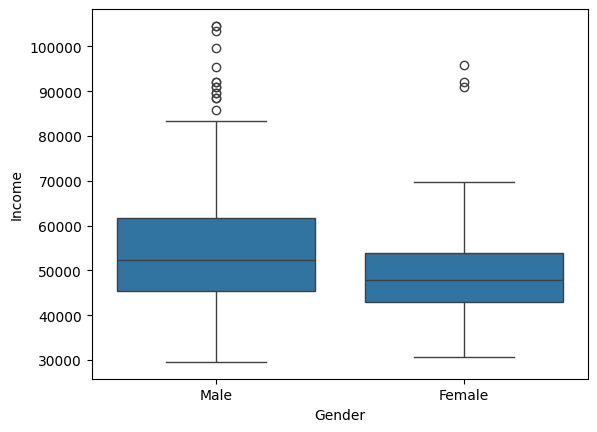

In [ ]:
sns.boxplot(x= "Gender", y = "Income", data = df)

In [ ]:
income_male = df[df["Gender"] == "Male"]["Income"]
income_female = df[df["Gender"] == "Female"]["Income"]

In [ ]:
t_stat, p_value = ttest_ind(income_male, income_female, alternative = "greater")
p_value

0.003263631548607129

In [ ]:
t_stat, p_value = ttest_ind(income_male, income_female, alternative = "two-sided")
p_value

0.006527263097214258

#Paired t-test

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1PZ1cC8nBZEtvnOYjfrg4xyErI-5i_-ae -O problem_solving.csv

--2024-06-26 17:25:42--  https://drive.google.com/uc?id=1PZ1cC8nBZEtvnOYjfrg4xyErI-5i_-ae
Resolving drive.google.com (drive.google.com)... 142.250.99.138, 142.250.99.102, 142.250.99.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.99.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1PZ1cC8nBZEtvnOYjfrg4xyErI-5i_-ae [following]
--2024-06-26 17:25:42--  https://drive.usercontent.google.com/download?id=1PZ1cC8nBZEtvnOYjfrg4xyErI-5i_-ae
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.202.132, 2607:f8b0:400e:c02::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.202.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1277 (1.2K) [application/octet-stream]
Saving to: ‘problem_solving.csv’

problem_solving.csv 100%[===================>]   1.25K  --.-KB/s    in 0s      

2024-06-26 17:25:43 (45.1 M

In [ ]:
df = pd.read_csv("problem_solving.csv")

In [ ]:
df.head()

,id,test_1,test_2
0,0,40,38
1,1,49,44
2,2,65,69
3,3,59,63
4,4,44,43


In [ ]:
df["test_1"].mean()

60.48905109489051

In [ ]:
df["test_2"].mean()

62.43065693430657

In [ ]:
from scipy.stats import ttest_rel

#Ha: Test1 avg score is lesser than test2 avg score
t_stat, p_value = ttest_rel(df["test_1"], df["test_2"], alternative = "less" )
p_value

8.979201768961566e-08

In [ ]:
#Ha: Test1 avg score is greater than test2 avg score
t_stat, p_value = ttest_rel(df["test_1"], df["test_2"], alternative = "greater" )
p_value

0.9999999102079823

In [ ]:
#Ha: Test1 avg score is significantly different than test2 avg score
t_stat, p_value = ttest_rel(df["test_1"], df["test_2"], alternative = "two-sided" )
p_value

1.795840353792313e-07

In [ ]:
#Assign

In [ ]:
female_scores=[25,30,45,49,47,35,32,42]

male_scores=[45,47,25,22,29,32,27,28,40,49,50,33]


In [ ]:
t_stat, p_value = ttest_ind(female_scores, male_scores, alternative = "greater")
p_value

0.2847023809445894